In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn import metrics

from matplotlib import pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import plotly.express as px

import seaborn as sns
import random

In [5]:
df_train_original = pd.read_csv(r"C:\Users\LENOVO\Desktop\extracted_data\fraudTrain.csv")

df_train_original.drop(df_train_original.columns[0], axis=1, inplace=True)



In [6]:
df_test_original = pd.read_csv(r"C:\Users\LENOVO\Desktop\extracted_data\fraudTest.csv")

df_test_original.drop(df_test_original.columns[0], axis=1, inplace=True)

In [7]:
# In order to seperate test and training subsets later on in the notebook
df_original = pd.concat([df_train_original,df_test_original], axis = 0)

In [8]:
# Define the proportion of the sample size we want
sample_size = 0.15  

# Performing stratified sampling
df, _ = train_test_split(df_train_original, test_size=1-sample_size, stratify=df_train_original['is_fraud'], random_state=42)

# Displaying the sampled DataFrame
df.shape

(194501, 22)

In [9]:
def df_explore(df):
    missing = pd.DataFrame((df.isna().sum()/df.shape[0])*100).reset_index().rename(columns={'index': 'column',0:'%_missing'}).sort_values(by = '%_missing',ascending=False)
    nunique = pd.DataFrame(df.nunique()).reset_index().rename(columns={'index': 'column',0:'nunique'}).sort_values(by = 'nunique',ascending=False)
    dtypes = pd.DataFrame(df.dtypes).reset_index().rename(columns={'index': 'column',0:'dtype'})
    return pd.merge(pd.merge(dtypes,missing,on='column'),nunique,on='column',how='left').sort_values(by='%_missing',ascending=False).sort_values(by = 'nunique', ascending = False)
print(df.shape)

df_explore(df).head(10)

(194501, 22)


,column,dtype,%_missing,nunique
17,trans_num,object,0.0,194501
20,merch_long,float64,0.0,194042
18,unix_time,int64,0.0,194009
0,trans_date_trans_time,object,0.0,194008
19,merch_lat,float64,0.0,193373
4,amt,float64,0.0,26167
8,street,object,0.0,968
1,cc_num,int64,0.0,968
11,zip,int64,0.0,957
13,long,float64,0.0,956


Text(0.5, 1.0, '% of Fraudulent vs Non-fraudulent transactions')

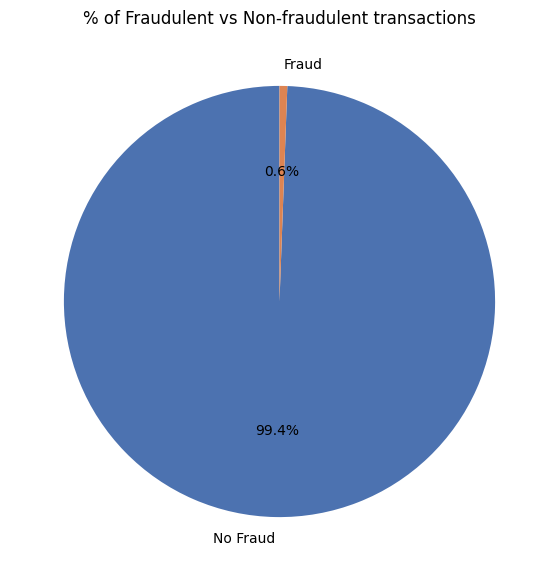

In [10]:
df['is_fraud_cat'] = df['is_fraud'].apply(lambda x: "Fraud" if x==1 else "No Fraud")

is_fraud_values = df['is_fraud_cat'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(is_fraud_values, labels=is_fraud_values.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("deep", n_colors=len(is_fraud_values)))
plt.title('% of Fraudulent vs Non-fraudulent transactions')

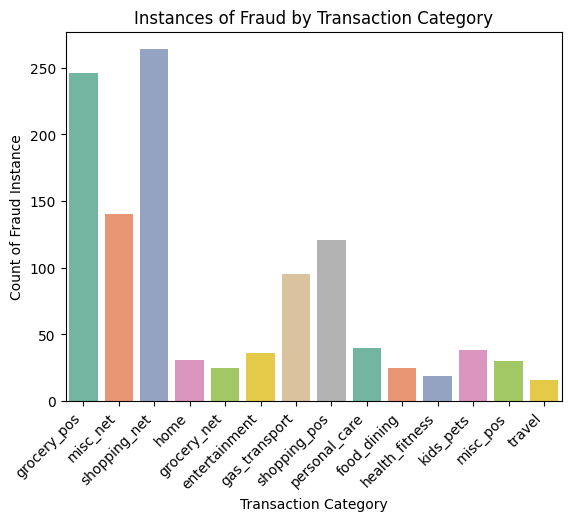

<Figure size 700x700 with 0 Axes>

In [11]:
sns.countplot(x="category", data=df[df['is_fraud_cat']=="Fraud"], palette="Set2", hue = 'category')

plt.title('Instances of Fraud by Transaction Category')
plt.xlabel('Transaction Category')
plt.ylabel('Count of Fraud Instance')
plt.xticks(rotation=45, ha = 'right')
plt.figure(figsize=(7, 7))
plt.show()

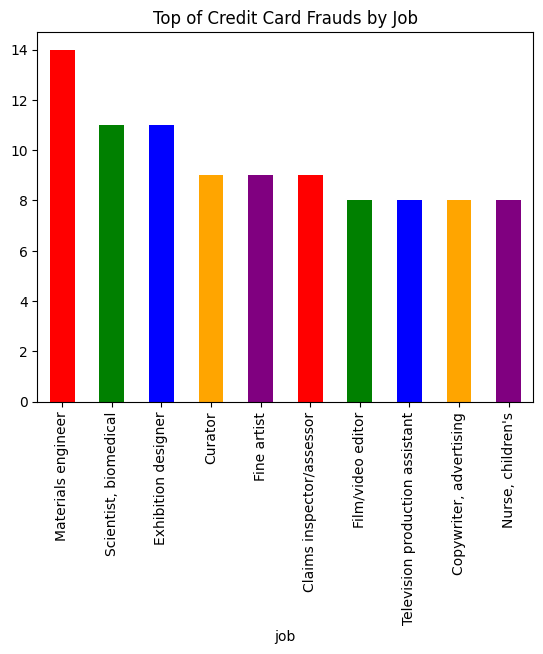

In [12]:
df[df['is_fraud_cat']=="Fraud"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",x='job', y=df['is_fraud_cat']=="Fraud", color=['red', 'green', 'blue', 'orange', 'purple'])
plt.title("Top of Credit Card Frauds by Job")
plt.show()

In [13]:
df2 = df.copy()

df2.drop_duplicates(inplace=True)

print("Duplicated values dropped")


Duplicated values dropped


In [14]:
def gender_transform(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
df2['gender'] = df2['gender'].transform(gender_transform)

In [15]:
df3 = df2.drop(['unix_time','trans_date_trans_time','cc_num','trans_num','street','dob','city','merchant','job','last','first','state','is_fraud_cat'],axis = 1)

In [16]:
df3_dummies = pd.get_dummies(df3.select_dtypes('object'), dtype = int)

df4 = pd.concat([df3.drop(df3.select_dtypes('object').columns, axis = 1), df3_dummies],axis = 1)

print(df4.shape)
df4.head()

(194501, 23)


,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
398918,55.05,0,37849,36.0435,-84.0400,25459,36.175640,-84.646341,0,0,...,0,0,0,1,0,0,0,0,0,0
655541,3.03,0,7208,40.6747,-74.2239,124967,40.939505,-74.256242,0,0,...,0,0,0,0,0,1,0,0,0,0
911788,139.01,1,45342,39.6321,-84.2675,36784,39.822635,-84.105583,0,1,...,0,0,0,0,0,0,0,0,0,0
86389,55.74,1,29032,34.3424,-80.5000,4424,34.962050,-80.168628,0,0,...,0,0,0,0,0,0,0,0,0,0
289156,93.78,1,73559,34.7032,-98.9591,540,34.068722,-98.940711,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
X = df4.reset_index(drop='index').drop('is_fraud', axis=1)

y = df4.reset_index(drop='index')['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [18]:
 #Creating a function for scaling

def Standard_Scaler (df, col_names):

    features = df[col_names]

    scaler = StandardScaler().fit(features.values)

    features = scaler.transform(features.values)

    df[col_names] = features

    return df

col_names = ['amt']

X_train = Standard_Scaler (X_train, col_names)

X_test = Standard_Scaler (X_test, col_names)

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

In [21]:
X_sample = X_train.sample(frac=0.1, random_state=42)
y_sample = y_train.loc[X_sample.index]
rf.fit(X_sample, y_sample)


RandomForestClassifier(n_estimators=200)

In [23]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [24]:
rf = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)
rf.fit(X_train, y_train)



RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [25]:
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [26]:
import time
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
print(f"Training time: {end - start} seconds")


Training time: 4.713858127593994 seconds


In [28]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Initialize the RandomForestClassifier with optimized parameters
rf = RandomForestClassifier(
    n_estimators=50,      # Number of trees
    max_depth=10,         # Maximum depth of trees
    random_state=42,      # Random state for reproducibility
    n_jobs=-1             # Use all available cores
)

# Start training
print("Training the RandomForestClassifier...")
start_time = time.time()
rf.fit(X_train, y_train)  # Fit the model
end_time = time.time()

# Display training time
print(f"Training completed in {end_time - start_time:.2f} seconds.")

# Make predictions on the test set
print("\nMaking predictions...")
y_pred_baseline = rf.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy on test set:", accuracy_score(y_test, y_pred_baseline))
print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline))


Training the RandomForestClassifier...
Training completed in 3.28 seconds.

Making predictions...

Model Evaluation:
Accuracy on test set: 0.996161162619321

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     58013
           1       0.89      0.38      0.54       338

    accuracy                           1.00     58351
   macro avg       0.94      0.69      0.77     58351
weighted avg       1.00      1.00      1.00     58351



In [29]:
cm = confusion_matrix(y_test, y_pred_baseline)

rf_baseline_Recall = recall_score(y_test, y_pred_baseline)
rf_baseline_Precision = precision_score(y_test, y_pred_baseline)
rf_baseline_f1 = f1_score(y_test, y_pred_baseline)
rf_baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

ndf = [(rf_baseline_Recall, rf_baseline_Precision, rf_baseline_f1, rf_baseline_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest performed with', 'Original (Imbalanced Dataset)')
rf_score

,Random Forest performed with,Recall,Precision,F1 Score,Accuracy
0,Original (Imbalanced Dataset),0.384615,0.890411,0.53719,0.996161


In [30]:
from imblearn.over_sampling import RandomOverSampler
# defining oversampling method
ros = RandomOverSampler(random_state=42)

rf_oversample = RandomForestClassifier(n_estimators=200)
X_train_oversample, y_train_oversample = ros.fit_resample(X_train, y_train)

In [32]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Initialize the RandomForestClassifier with optimized parameters
rf_oversample = RandomForestClassifier(
    n_estimators=50,  # Number of trees in the forest (reduce if training is slow)
    max_depth=10,     # Maximum depth of the trees (adjust based on dataset complexity)
    random_state=42,  # For reproducibility
    n_jobs=-1         # Use all available CPU cores
)

# Measure training time
print("Training the RandomForestClassifier on oversampled data...")
start_time = time.time()

try:
    # Fit the model on oversampled training data
    rf_oversample.fit(X_train_oversample, y_train_oversample)
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")

    # Make predictions on the test set
    print("\nMaking predictions on the test data...")
    y_pred_oversample = rf_oversample.predict(X_test)

    # Evaluate the model
    print("\nModel Evaluation:")
    print("Accuracy on test set:", accuracy_score(y_test, y_pred_oversample))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_oversample))

except KeyboardInterrupt:
    print("\nTraining interrupted. Consider reducing `n_estimators` or `max_depth`.")



Training the RandomForestClassifier on oversampled data...
Training completed in 5.89 seconds.

Making predictions on the test data...

Model Evaluation:
Accuracy on test set: 0.9896488492056691

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     58013
           1       0.34      0.86      0.49       338

    accuracy                           0.99     58351
   macro avg       0.67      0.92      0.74     58351
weighted avg       1.00      0.99      0.99     58351



In [33]:
from imblearn.under_sampling import RandomUnderSampler
# defining oversampling method
rus = RandomUnderSampler(random_state=42)

rf_undersample = RandomForestClassifier(n_estimators=200)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)
rf_undersample.fit(X_train_undersample, y_train_undersample)
y_pred_undersample = rf_undersample.predict(X_test)
print("Performance with Random Undersampling:")
print(classification_report(y_test, y_pred_undersample))

Performance with Random Undersampling:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     58013
           1       0.11      0.93      0.20       338

    accuracy                           0.96     58351
   macro avg       0.56      0.95      0.59     58351
weighted avg       0.99      0.96      0.97     58351



In [34]:
cm = confusion_matrix(y_test, y_pred_undersample)

undersample_rf_Recall = recall_score(y_test, y_pred_undersample)
undersample_rf_Precision = precision_score(y_test, y_pred_undersample)
undersample_rf_f1 = f1_score(y_test, y_pred_undersample)
undersample_rf_accuracy = accuracy_score(y_test, y_pred_undersample)

ndf_over = [(undersample_rf_Recall, undersample_rf_Precision, undersample_rf_f1, undersample_rf_accuracy)]

undersample_rf_score = pd.DataFrame(data = ndf_over, columns=['Recall','Precision','F1 Score', 'Accuracy'])
undersample_rf_score.insert(0, 'Random Forest performed with', 'Random Undersampling')
undersample_rf_score

,Random Forest performed with,Recall,Precision,F1 Score,Accuracy
0,Random Undersampling,0.934911,0.111268,0.198867,0.956368


In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
rf_smote = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
rf_smote.fit(X_train_smote,y_train_smote)
y_pred_smote = rf_smote.predict(X_test)
print("Performance with SMOTE:")
print(classification_report(y_test, y_pred_smote))


C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 

KeyboardInterrupt: 

In [36]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Replace "4" with the number of physical cores


In [37]:
rf_oversample = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=1  # Disable parallelism
)


In [40]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import time

# Subsample the data for testing (optional for large datasets)
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train[X_train_sample.index]

# SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sample, y_train_sample)

# Optimized Random Forest parameters
rf_smote = RandomForestClassifier(
    n_estimators=10,       # Reduced number of trees
    max_depth=3,           # Reduced tree depth
    min_samples_split=10,  # Increased minimum samples for splitting
    max_features="sqrt",   # Consider fewer features at each split
    random_state=42,
    n_jobs=1               # Use single-threaded processing
)

# Measure training time
start_time = time.time()
rf_smote.fit(X_train_smote, y_train_smote)
training_time = time.time() - start_time

# Predictions and evaluation
y_pred_smote = rf_smote.predict(X_test)
print(f"Training completed in {training_time:.2f} seconds")
print("Performance with SMOTE:")
print(classification_report(y_test, y_pred_smote))


Training completed in 0.26 seconds
Performance with SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     58013
           1       0.07      0.76      0.12       338

    accuracy                           0.94     58351
   macro avg       0.53      0.85      0.55     58351
weighted avg       0.99      0.94      0.96     58351



In [41]:
cm_smote = confusion_matrix(y_test, y_pred_smote)
rf_smote_Recall = recall_score(y_test, y_pred_smote)
rf_smote_Precision = precision_score(y_test, y_pred_smote)
rf_smote_f1 = f1_score(y_test, y_pred_smote)
rf_smote_accuracy = accuracy_score(y_test, y_pred_smote)

ndf = [(rf_smote_Recall, rf_smote_Precision, rf_smote_f1, rf_smote_accuracy)]

rf_smote_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_smote_score.insert(0, 'Random Forest performed with', 'Smote Oversampling')
rf_smote_score

,Random Forest performed with,Recall,Precision,F1 Score,Accuracy
0,Smote Oversampling,0.763314,0.067681,0.124337,0.937722


In [48]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)


In [49]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)

In [50]:
X_train_subset = X_train.sample(frac=0.1, random_state=42)  # Take 10% of the data
y_train_subset = y_train.sample(frac=0.1, random_state=42)
rf.fit(X_train_subset, y_train_subset)


RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [51]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming you have already loaded and preprocessed X_train, X_test, y_train, y_test

# Step 1: Train the base RandomForest model
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_score = classification_report(y_test, rf.predict(X_test), output_dict=True)

# Step 2: Train the oversampled RandomForest model
oversample = RandomOverSampler(random_state=42)
X_train_oversample, y_train_oversample = oversample.fit_resample(X_train, y_train)
oversample_rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42, n_jobs=-1)
oversample_rf.fit(X_train_oversample, y_train_oversample)
oversample_rf_score = classification_report(y_test, oversample_rf.predict(X_test), output_dict=True)

# Step 3: Train the undersampled RandomForest model
undersample = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)
undersample_rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42, n_jobs=-1)
undersample_rf.fit(X_train_undersample, y_train_undersample)
undersample_rf_score = classification_report(y_test, undersample_rf.predict(X_test), output_dict=True)

# Step 4: Train the SMOTE (Synthetic Minority Over-sampling Technique) RandomForest model
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
rf_smote = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42, n_jobs=-1)
rf_smote.fit(X_train_smote, y_train_smote)
rf_smote_score = classification_report(y_test, rf_smote.predict(X_test), output_dict=True)

# Step 5: Combine the results into a single dataframe for comparison
rf_sampling_scores = pd.concat([pd.DataFrame(rf_score).transpose(),
                                pd.DataFrame(oversample_rf_score).transpose(),
                                pd.DataFrame(undersample_rf_score).transpose(),
                                pd.DataFrame(rf_smote_score).transpose()],
                               axis=0, ignore_index=True)

# Step 6: Display the scores
rf_sampling_scores


,precision,recall,f1-score,support
0,0.994770,0.999897,0.997326,58013.000000
1,0.846154,0.097633,0.175066,338.000000
2,0.994670,0.994670,0.994670,0.994670
3,0.920462,0.548765,0.586196,58351.000000
4,0.993909,0.994670,0.992563,58351.000000
5,0.999138,0.979056,0.988995,58013.000000
6,0.192154,0.855030,0.313789,338.000000
7,0.978338,0.978338,0.978338,0.978338
8,0.595646,0.917043,0.651392,58351.000000
9,0.994464,0.978338,0.985084,58351.000000


In [53]:
accuracy = accuracy_score(y_test, y_pred_undersample)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 95.64%


In [54]:
# remapping the classes 
class_names = {1:'Fraud',0:'No Fraud'}
predicted_classes = [class_names[label] for label in y_pred_undersample]

# Mapping true labels to custom class names
class_map = [class_names[label] for label in y_test]

# Step 10: Print the predicted and actual class names for the first 5 test samples
for i in range(20):
    print(f"Sample {i+1}: True Class: {class_map[i]}, Predicted Class: {predicted_classes[i]}")

Sample 1: True Class: No Fraud, Predicted Class: No Fraud
Sample 2: True Class: No Fraud, Predicted Class: No Fraud
Sample 3: True Class: No Fraud, Predicted Class: No Fraud
Sample 4: True Class: No Fraud, Predicted Class: No Fraud
Sample 5: True Class: No Fraud, Predicted Class: No Fraud
Sample 6: True Class: No Fraud, Predicted Class: No Fraud
Sample 7: True Class: No Fraud, Predicted Class: No Fraud
Sample 8: True Class: No Fraud, Predicted Class: No Fraud
Sample 9: True Class: No Fraud, Predicted Class: No Fraud
Sample 10: True Class: No Fraud, Predicted Class: No Fraud
Sample 11: True Class: No Fraud, Predicted Class: No Fraud
Sample 12: True Class: No Fraud, Predicted Class: No Fraud
Sample 13: True Class: No Fraud, Predicted Class: No Fraud
Sample 14: True Class: No Fraud, Predicted Class: No Fraud
Sample 15: True Class: No Fraud, Predicted Class: No Fraud
Sample 16: True Class: No Fraud, Predicted Class: No Fraud
Sample 17: True Class: No Fraud, Predicted Class: No Fraud
Sample